# KNN Algorithm

1. KNN (K Nearest Neighbour) is a supervised learning algorithm used for classification and regression tasks.

2. It classifies a new data point by checking the K closest data points in the training set and looking at their labels.

3. The algorithm compares feature similarity, meaning the new point is assigned the label that most of its nearest neighbours belong to.

4. KNN does not build a model; it stores all data and makes predictions based on distance calculations during testing.

5. It is simple and effective for small datasets but becomes slow when dataset size increases.

## 1. **Features of KNN, Short Notes**

**Non parametric**
- KNN makes no assumptions about the data distribution. It works purely based on distance between samples.

**Simple Algorithm**
- Easy to understand and implement because it has no complex mathematical model.

**Supervised Learning Algorithm**
- KNN uses labeled data to make predictions. It stores all training data and compares new samples with it.

**Lazy Algorithm**
- KNN does not build a model during training. It only performs computations when predicting. This makes training fast but prediction slow.

**Classification and Regression**
- KNN can be used for both types of problems. For classification it votes, and for regression it averages.

**Based on Feature Similarity**
- Predictions depend on how similar a new data point is to its nearest neighbours based on distance metrics.

**No Training Step**
- There is no explicit training phase. All work happens at the time of prediction using stored examples.

## 2. How KNN Works

- **Choose a value of k, which is the number of nearest neighbours to consider. Example: k=7.**

- For a new data point, measure the distance between this point and all other points in the training dataset, using metrics like Euclidean distance.

- Select the k closest points from the training data. These are the nearest neighbours.

- Count how many neighbours belong to each class. For example, how many are Class A and how many are Class B.

- Assign the new data point to the majority class among the k neighbours. If most neighbours are Class A, the new point is classified as Class A.

##  3. How to Determine the Best k Value in KNN

**Use the Square Root Rule**
- A quick starting point is:

- k = sqrt(total number of samples)


- Example: If you have 200 samples, k ≈ 14.

## Euclidean Distance

**Euclidean distance is the straight line distance between two points in a coordinate system. It is the most commonly used distance measure in KNN.**

- If two points are
1. P1 = (x1, y1)
2.  P2 = (x2, y2)

Then the Euclidean distance is calculated as:
**distance = sqrt((x2 - x1)^2 + (y2 - y1)^2)**

- In the example:
P1 = (1, 4)
P2 = (5, 1)

**Distance = sqrt((5 − 1)^2 + (4 − 1)^2) = sqrt(16 + 9) = 5**
- This distance helps KNN decide which data points are nearest to the new point.

## Hands on Practicals 

In [1]:
# Importing the needed Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
get_ipython().run_line_magic('matplotlib' , 'inline')

In [3]:
# Get the data 
from sklearn.datasets import load_breast_cancer

In [4]:
cancer_data = load_breast_cancer()

In [6]:
# The data set is presented in a dictinory form:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [9]:
cancer_data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
df_feat = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
cancer_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [15]:
df_target = pd.DataFrame(cancer_data['target'],columns=['Cancer'])

In [16]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# Standardizing the variables 
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(df_feat)

,copy,True
,with_mean,True
,with_std,True


In [24]:
scaled_features = scaler.transform(df_feat)

In [25]:
df_feat_scaled = pd.DataFrame(scaled_features,columns=df_feat.columns)

In [26]:
df_feat_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [28]:
# Testing and Training part 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(scaled_features, np.ravel(df_target),
                                                       test_size=0.30 , random_state=105)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.fit(X_train , y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [34]:
pred = knn.predict(X_test)

In [35]:
# Predictions and Evaluations

from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score

In [39]:
print(confusion_matrix(y_test , pred))

[[ 55   4]
 [  5 107]]


In [44]:
print(accuracy_score(y_test , pred)*100)

94.73684210526315


In [45]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        59
           1       0.96      0.96      0.96       112

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [46]:
# Chooosing a K value

error_rate = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train , y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

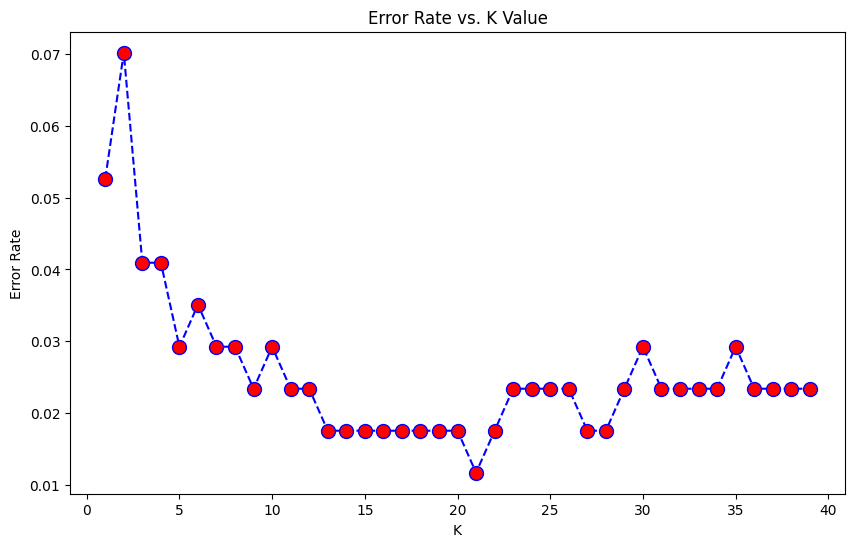

In [49]:
plt.figure(figsize=(10,6))
plt.plot(
    range(1,40),
    error_rate,
    color='blue',
    linestyle='dashed',
    marker='o',
    markerfacecolor='red',
    markersize=10
)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [53]:
# Comparing the new result to K=1

# WITH K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print(accuracy_score(y_test , pred)*100)

WITH K=1


[[ 55   4]
 [  5 107]]


              precision    recall  f1-score   support

           0       0.92      0.93      0.92        59
           1       0.96      0.96      0.96       112

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

94.73684210526315


In [55]:
# Comparing the new result to K=21

# WITH K=21
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print(accuracy_score(y_test , pred)*100)

WITH K=21


[[ 57   2]
 [  0 112]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.98      1.00      0.99       112

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

98.83040935672514


# The End!! 